In [1]:
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
pd.options.display.max_rows = 500

In [3]:
df = pd.read_csv('../data/city_temperature.csv')
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [8]:
gb = df.groupby(['Region', 'Country', 'State', 'City'])

In [47]:
gb.get_group(('North America', 'US', 'Arizona', 'Phoenix'))

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1519419,North America,US,Arizona,Phoenix,1,1,1995,50.6
1519420,North America,US,Arizona,Phoenix,1,2,1995,53.0
1519421,North America,US,Arizona,Phoenix,1,3,1995,52.0
1519422,North America,US,Arizona,Phoenix,1,4,1995,52.5
1519423,North America,US,Arizona,Phoenix,1,5,1995,55.7
...,...,...,...,...,...,...,...,...
1528679,North America,US,Arizona,Phoenix,5,9,2020,90.7
1528680,North America,US,Arizona,Phoenix,5,10,2020,90.2
1528681,North America,US,Arizona,Phoenix,5,11,2020,87.7
1528682,North America,US,Arizona,Phoenix,5,12,2020,85.5


In [63]:
# Create dict with keys as unique values in Region
# def dict_maker():
locations = {}
[locations.update({x:{}}) for x in df['Region'].unique()]
keys = locations.keys()
for x in keys:
    country_list = df[df['Region']==x]['Country'].unique()
    # print(x, country_list)
    d = dict.fromkeys(country_list,{})
    locations.update({x:d})
locations.values()
for x in keys
    cities = df[df['Country']==]
    d = dict.fromkeys()
print(locations)
# dict_maker()

{'Africa': {'Algeria': {}, 'Burundi': {}, 'Benin': {}, 'Central African Republic': {}, 'Congo': {}, 'Egypt': {}, 'Ethiopia': {}, 'Gabon': {}, 'Gambia': {}, 'Guinea': {}, 'Guinea-Bissau': {}, 'Ivory Coast': {}, 'Kenya': {}, 'Morocco': {}, 'Madagascar': {}, 'Mauritania': {}, 'Malawi': {}, 'Mozambique': {}, 'Namibia': {}, 'Nigeria': {}, 'Senegal': {}, 'Sierra Leone': {}, 'South Africa': {}, 'Togo': {}, 'Tunisia': {}, 'Tanzania': {}, 'Uganda': {}, 'Zambia': {}}, 'Asia': {'Bangladesh': {}, 'China': {}, 'Hong Kong': {}, 'India': {}, 'Indonesia': {}, 'Japan': {}, 'Kazakhstan': {}, 'Kyrgyzstan': {}, 'Laos': {}, 'Malaysia': {}, 'Mongolia': {}, 'Myanmar (Burma)': {}, 'Nepal': {}, 'North Korea': {}, 'Pakistan': {}, 'Philippines': {}, 'Singapore': {}, 'South Korea': {}, 'Sri Lanka': {}, 'Taiwan': {}, 'Tajikistan': {}, 'Thailand': {}, 'Turkmenistan': {}, 'Uzbekistan': {}, 'Vietnam': {}}, 'Australia/South Pacific': {'Australia': {}, 'New Zealand': {}}, 'Europe': {'Albania': {}, 'Austria': {}, 'Belar

In [67]:
locations.values()

dict_values([{'Algeria': {}, 'Burundi': {}, 'Benin': {}, 'Central African Republic': {}, 'Congo': {}, 'Egypt': {}, 'Ethiopia': {}, 'Gabon': {}, 'Gambia': {}, 'Guinea': {}, 'Guinea-Bissau': {}, 'Ivory Coast': {}, 'Kenya': {}, 'Morocco': {}, 'Madagascar': {}, 'Mauritania': {}, 'Malawi': {}, 'Mozambique': {}, 'Namibia': {}, 'Nigeria': {}, 'Senegal': {}, 'Sierra Leone': {}, 'South Africa': {}, 'Togo': {}, 'Tunisia': {}, 'Tanzania': {}, 'Uganda': {}, 'Zambia': {}}, {'Bangladesh': {}, 'China': {}, 'Hong Kong': {}, 'India': {}, 'Indonesia': {}, 'Japan': {}, 'Kazakhstan': {}, 'Kyrgyzstan': {}, 'Laos': {}, 'Malaysia': {}, 'Mongolia': {}, 'Myanmar (Burma)': {}, 'Nepal': {}, 'North Korea': {}, 'Pakistan': {}, 'Philippines': {}, 'Singapore': {}, 'South Korea': {}, 'Sri Lanka': {}, 'Taiwan': {}, 'Tajikistan': {}, 'Thailand': {}, 'Turkmenistan': {}, 'Uzbekistan': {}, 'Vietnam': {}}, {'Australia': {}, 'New Zealand': {}}, {'Albania': {}, 'Austria': {}, 'Belarus': {}, 'Belgium': {}, 'Bulgaria': {}, 'Cr

In [35]:
type(df['State'].unique()[0])

float

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [4]:
df_grouped = df.groupby('Region')

In [5]:
df_grouped.count()

,Country,State,City,Month,Day,Year,AvgTemperature
Region,,,,,,,
Africa,251118,0,251118,251118,251118,251118,251118
Asia,316663,0,316663,316663,316663,316663,316663
Australia/South Pacific,55596,0,55596,55596,55596,55596,55596
Europe,381990,0,381990,381990,381990,381990,381990
Middle East,124749,0,124749,124749,124749,124749,124749
North America,1556681,1455337,1556681,1556681,1556681,1556681,1556681
South/Central America & Carribean,219530,0,219530,219530,219530,219530,219530


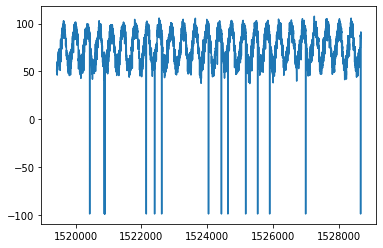

In [6]:
az = df[df['State'] == 'Arizona']
phx = az[az['City'] == 'Phoenix']
phx['AvgTemperature'].plot()

In [7]:
phx_temps = phx['AvgTemperature']
clean_phx_temps = phx_temps[(np.abs(stats.zscore(phx_temps)) < 3)]

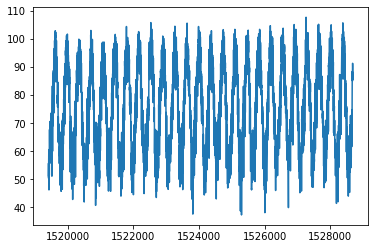

In [8]:
clean_phx_temps.plot()

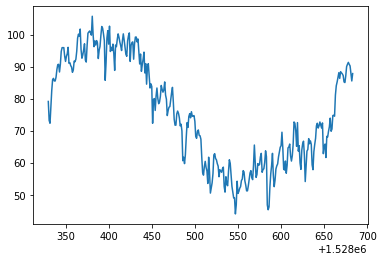

In [9]:
clean_phx_temps.loc[1528330:].plot()

In [10]:
clean_phx_temps.loc[1528330:].describe()

count    353.000000
mean      75.637677
std       16.252343
min       44.000000
25%       60.500000
50%       74.000000
75%       91.000000
max      105.700000
Name: AvgTemperature, dtype: float64

In [13]:
df.values[0]

array(['Africa', 'Algeria', nan, 'Algiers', 1, 1, 1995, 64.2],
      dtype=object)